# Stock Market Prediction And Forecasting Using Stacked LSTM

## The Imports for the program below

In [496]:
import pandas as pd
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import numpy
from numpy import array

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import tensorflow as tf

## Importing the dataset from a csv file
We'll be using only the closing values.

In [497]:
df=pd.read_csv('NSETATA.csv')
df1=df.reset_index()['Close']

## Plotting the initial dataset

(0       215.15
 1       209.20
 2       218.20
 3       227.60
 4       230.90
          ...  
 1230    159.45
 1231    160.05
 1232    160.15
 1233    155.55
 1234    155.80
 Name: Close, Length: 1235, dtype: float64,
 [<matplotlib.lines.Line2D at 0x7f5184b97390>])

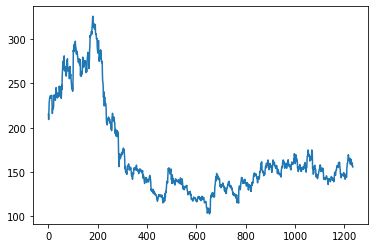

In [498]:
df1, plt.plot(df1)

## The Initial Data Values after they are scaled down to values between 0 and 1 according to the minimum and maximum values of the dataset

(array([[0.50425818],
        [0.47758853],
        [0.51792918],
        ...,
        [0.25773196],
        [0.2371134 ],
        [0.23823398]]), [<matplotlib.lines.Line2D at 0x7f5184b6c898>])

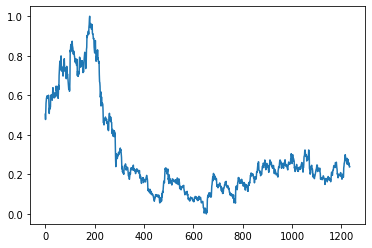

In [499]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1, plt.plot(df1)

In [500]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1),:1]
training_size,test_size

(802, 433)

## The first 10 values for the training data

In [501]:
train_data[:10]

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       [0.56006275],
       [0.57485433],
       [0.58762887],
       [0.58538772],
       [0.58987001],
       [0.59816226],
       [0.58561183]])

## Adding the previous 100 values as the second array for each element in our dataset for the LSTM format required by Tensorflow

In [502]:
def prepare_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)
time_step = 100
X_train, y_train = prepare_dataset(train_data, time_step)
X_test, ytest = prepare_dataset(test_data, time_step)
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Configuring The Model
The LSTM model used has 50 neurons and the input shape that we've prepared.

In [503]:
model=Sequential()
model.add(LSTM(50,input_shape=(100,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 50)                10400     
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


## Training the model

In [504]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 [==============================] - 1s 106ms/step - loss: 0.0969 - val_loss: 8.1893e-04
Epoch 2/100
11/11 [==============================] - 1s 61ms/step - loss: 0.0130 - val_loss: 0.0020
Epoch 3/100
11/11 [==============================] - 1s 67ms/step - loss: 0.0069 - val_loss: 6.5998e-04
Epoch 4/100
11/11 [==============================] - 1s 68ms/step - loss: 0.0030 - val_loss: 7.4578e-04
Epoch 5/100
11/11 [==============================] - 1s 66ms/step - loss: 0.0021 - val_loss: 0.0012
Epoch 6/100
11/11 [==============================] - 1s 68ms/step - loss: 0.0017 - val_loss: 9.7106e-04
Epoch 7/100
11/11 [==============================] - 1s 69ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 8/100
11/11 [==============================] - 1s 67ms/step - loss: 0.0017 - val_loss: 8.8820e-04
Epoch 9/100
11/11 [==============================] - 1s 64ms/step - loss: 0.0017 - val_loss: 7.5263e-04
Epoch 10/100
11/11 [==============================] - 1s 64ms/step - loss: 

## Making the predictions using the trained model

In [505]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

### Below are show the first 10 elements for both the training data predictions and the testing data predictions.

In [506]:
train_predict[:10], test_predict[:10]

(array([[0.6197951 ],
        [0.6299661 ],
        [0.67442983],
        [0.72149086],
        [0.7719767 ],
        [0.8125562 ],
        [0.84614104],
        [0.8616352 ],
        [0.86417973],
        [0.8644889 ]], dtype=float32), array([[0.23418666],
        [0.2353228 ],
        [0.2348519 ],
        [0.23337638],
        [0.2296205 ],
        [0.22413093],
        [0.22069478],
        [0.21991494],
        [0.22306663],
        [0.2287901 ]], dtype=float32))

## Transforming the predicted values for the original scale

In [507]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [508]:
train_predict[:10], test_predict[:10]

(array([[240.92628],
        [243.19545],
        [253.11531],
        [263.6146 ],
        [274.878  ],
        [283.9313 ],
        [291.42407],
        [294.8808 ],
        [295.4485 ],
        [295.5175 ]], dtype=float32), array([[154.89703],
        [155.15053],
        [155.04546],
        [154.71626],
        [153.87834],
        [152.65361],
        [151.88701],
        [151.71303],
        [152.41617],
        [153.69307]], dtype=float32))

### Reshaping the originally used training and testing data to be able to calculate the root mean squared errors accurately for the original scale

In [509]:
y_train, ytest = y_train.reshape(701, 1), ytest.reshape(332, 1)
y_train = scaler.inverse_transform(y_train)
ytest = scaler.inverse_transform(ytest)
y_train[:10], ytest[:10]

(array([[255.9 ],
        [287.5 ],
        [285.25],
        [292.  ],
        [289.7 ],
        [294.2 ],
        [287.8 ],
        [286.65],
        [292.75],
        [297.55]]), array([[157.4 ],
        [155.2 ],
        [154.35],
        [151.55],
        [149.55],
        [152.4 ],
        [154.75],
        [158.55],
        [160.45],
        [163.6 ]]))

## The Root Mean Squared errors for the training and testing data predictions respectively

In [510]:
math.sqrt(mean_squared_error(y_train,train_predict))

5.694785447093947

In [511]:
math.sqrt(mean_squared_error(ytest,test_predict))

4.520160711157045

## Processing the Output Data and Plotting it

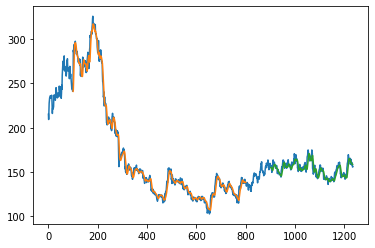

In [512]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [513]:
x_input=test_data[332:].reshape(1,-1)
x_input.shape

(1, 101)

In [514]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

## Predicting The Values for the next 10 days after the dataset ends

In [515]:
# demonstrate prediction for next 10 days
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

In [516]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

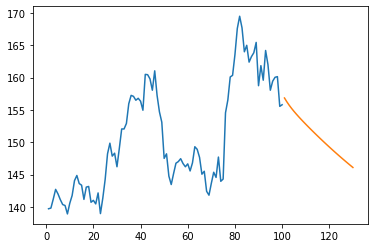

In [517]:
plt.plot(day_new,scaler.inverse_transform(df1[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

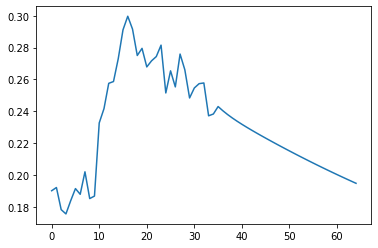

In [518]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [519]:
df3=scaler.inverse_transform(df3).tolist()

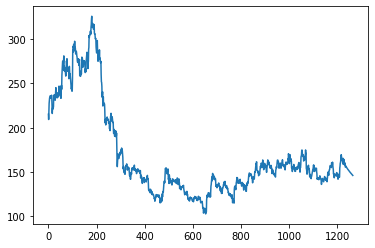

In [520]:
plt.plot(df3)